In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

## Chargement de la data

In [2]:
data = pd.read_csv('data.csv')

## Encodage des données en chiffres

In [3]:
labelencoder=LabelEncoder()

for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


##  Séparation de la data, récupération des labels et features

In [4]:
# Récupération des features, il y en a 22
X = data.iloc[:,1:23]

# Récupération des label
y = data.iloc[:,0] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Entraînement - prédiction

In [5]:
# Création d'un objet régréssion logistique
regression = LogisticRegression()

# Entraînement du modèle
regression.fit(X_train,y_train)

# On récupère la prédiction de la valeur positive
y_prob = regression.predict_proba(X_test)[:,1] 

# Création d'un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

# Air sous la courbe
roc_auc = auc(false_positive_rate, true_positive_rate)

print(roc_auc)

0.981332619091462


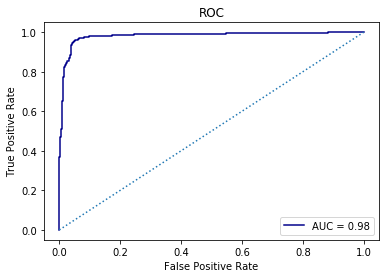

<Figure size 504x504 with 0 Axes>

In [6]:
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate, color='darkblue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle=':')
# plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(7,7))
plt.show()